In [2]:
!pip install pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Sports Analysis") \
    .getOrCreate()

print(spark.version)


3.5.3


In [4]:
import pandas as pd


In [5]:
from google.colab import files

# Télécharger le fichier kaggle.json (pré-requis)
files.upload()

# Configurer l'API Kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Exemple : Télécharger un fichier Kaggle
!kaggle datasets download -d <olympics_dataset.csv> --unzip


Saving olympics_dataset.csv.zip to olympics_dataset.csv.zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
/bin/bash: line 1: olympics_dataset.csv: No such file or directory


In [6]:
df = pd.read_csv('olympics_dataset.csv.zip')


In [8]:
print(df.head())  # Affiche les premières lignes
print(df.columns)  # Affiche les noms des colonnes


   player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  
Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      

In [9]:
print(df.isnull().sum())  # Affiche les colonnes avec des valeurs manquantes


player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


In [10]:
df = df.dropna()  # Supprime les lignes contenant des NaN


In [11]:
print(df.describe())


          player_id           Year
count  2.525650e+05  252565.000000
mean   2.305499e+05    1981.743908
std    4.289330e+05      32.596548
min    0.000000e+00    1896.000000
25%    5.713700e+04    1960.000000
50%    1.356110e+05    1988.000000
75%    2.118590e+05    2008.000000
max    9.460001e+06    2024.000000


In [12]:
print(df['Team'].value_counts())


Team
United States     16236
Great Britain     11390
France            11360
Italy              9185
Germany            8622
                  ...  
Mistral Hojris        1
Rambo                 1
Ravel                 1
Calimucho             1
Heidelberg            1
Name: count, Length: 1193, dtype: int64


In [13]:
medals_per_year = df.groupby('Year')['Medal'].count()
print(medals_per_year)


Year
1896      380
1900     1936
1904     1301
1906     1733
1908     3101
1912     4040
1920     4292
1924     5233
1928     4992
1932     2969
1936     6506
1948     6405
1952     8270
1956     5127
1960     8119
1964     7702
1968     8588
1972    10304
1976     8641
1980     7191
1984     9454
1988    12037
1992    12977
1996    13780
2000    13821
2004    13443
2008    13602
2012    12920
2016    13688
2020    15121
2024    14892
Name: Medal, dtype: int64


In [14]:
Comparaison_par_genre = df.groupby('Sex')['Medal'].count()
print( Comparaison_par_genre)

Sex
F     74021
M    178544
Name: Medal, dtype: int64


In [15]:
sprt= df.groupby('Sport')['Medal'].count()
print( sprt)

Sport
3x3 Basketball                 128
3x3 Basketball, Basketball       1
Aeronautics                      1
Alpinism                         4
Archery                       2846
                              ... 
Tug-Of-War                     170
Volleyball                    4003
Water Polo                    4418
Weightlifting                 4256
Wrestling                     7734
Name: Medal, Length: 76, dtype: int64


In [16]:
top_sport = df['Sport'].value_counts().idxmax()
medal_count = df['Sport'].value_counts().max()

print(f"The sport with the most medals is: {top_sport}, with {medal_count} medals.")

The sport with the most medals is: Athletics, with 43294 medals.


Sport
Athletics     43294
Gymnastics    26707
Swimming      26416
Shooting      12580
Rowing        11625
Fencing       11558
Cycling       10859
Football       7906
Wrestling      7734
Sailing        7266
Name: count, dtype: int64


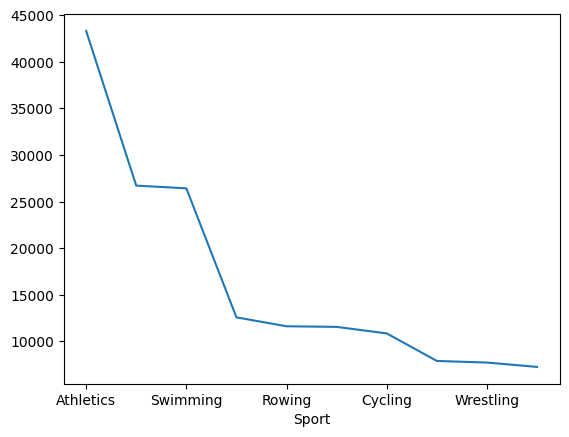

In [17]:
import matplotlib.pyplot as plt
top_sport = df['Sport'].value_counts().head(10)
top_sport.plot(kind='line')
print(top_sport)
plt.show()

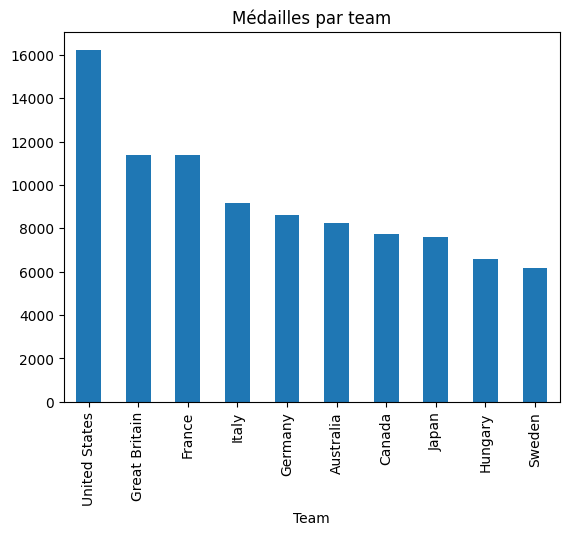

In [50]:
import matplotlib.pyplot as plt

country_medals = df['Team'].value_counts().head(10)  # Top 10 pays
country_medals.plot(kind='bar')
plt.title('Médailles par team')
plt.show()


In [56]:
m = df[df["Team"] == "Tunisia"].groupby('Sport')['Year'].count()
print(m)

Sport
Archery                         5
Athletics                      80
Basketball                     12
Beach Volleyball                2
Boxing                         50
Canoe Slalom                    3
Canoe Sprint                    6
Canoeing                        8
Cycling                        10
Fencing                        40
Football                       65
Gymnastics                      8
Handball                       72
Judo                           43
Marathon Swimming               1
Marathon Swimming, Swimming     4
Modern Pentathlon               6
Rowing                         13
Sailing                        11
Shooting                       11
Swimming                       33
Table Tennis                   19
Taekwondo                      13
Tennis                          8
Volleyball                     82
Weightlifting                  18
Wrestling                      42
Name: Year, dtype: int64


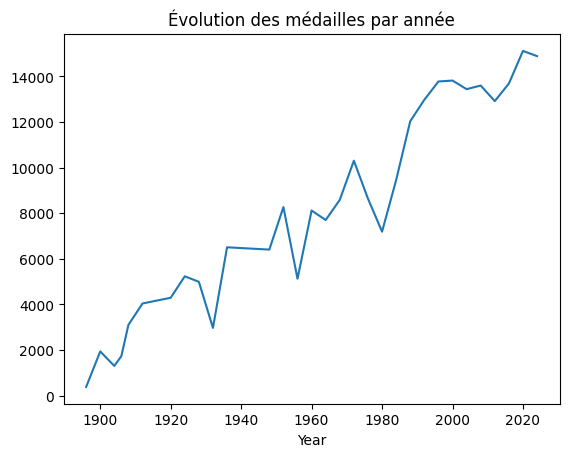

In [19]:
medals_per_year.plot(kind='line')
plt.title('Évolution des médailles par année')
plt.show()


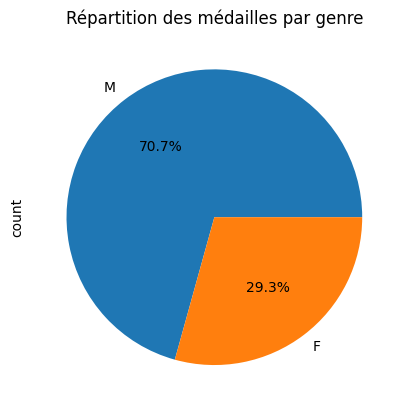

In [20]:
gender_distribution = df['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des médailles par genre')
plt.show()


In [21]:
grouped = df.groupby(['Year', 'Team'])['Medal'].count().reset_index()
print(grouped)


      Year                           Team  Medal
0     1896                      Australia      4
1     1896        Australia/Great Britain      2
2     1896                        Austria      8
3     1896                        Denmark     15
4     1896  Ethnikos Gymnastikos Syllogos      2
...    ...                            ...    ...
4521  2024              Virgin Islands, B      4
4522  2024             Virgin Islands, US      5
4523  2024                          Yemen      4
4524  2024                         Zambia     32
4525  2024                       Zimbabwe      7

[4526 rows x 3 columns]


In [22]:
top_countries = df['Team'].value_counts().head(10)
print(top_countries)


Team
United States    16236
Great Britain    11390
France           11360
Italy             9185
Germany           8622
Australia         8263
Canada            7736
Japan             7618
Hungary           6581
Sweden            6167
Name: count, dtype: int64


In [23]:
df.to_csv('resultats_analyse.csv', index=False)


In [24]:
summary = {
    # 1. Top 5 des pays avec le plus grand nombre de participants
    "top_countries": df['Team'].value_counts().head(5).to_dict(),

    # 2. Nombre total de médailles attribuées chaque année
    "medals_per_year": df.groupby('Year')['Medal'].count().to_dict(),

    # 3. Répartition des sexes parmi les participants
    "gender_distribution": df['Sex'].value_counts().to_dict(),

    # 4. Top 5 des sports avec le plus grand nombre de participants
    "top_sports": df['Sport'].value_counts().head(5).to_dict(),

    # 5. Distribution des médailles par type
    "medal_types": df['Medal'].value_counts().to_dict(),

    # 6. Nombre de médailles par pays (Top 5)
    "top_countries_medals": df[df['Medal'].notnull()]['Team'].value_counts().head(5).to_dict(),

    # 7. Nombre total de participants par année
    "participants_per_year": df.groupby('Year')['Name'].nunique().to_dict(),

    # 8. Répartition des participants entre les saisons (Été/Hiver)
    "season_distribution": df['Season'].value_counts().to_dict(),

    # 9. Top 5 des événements avec le plus grand nombre de médailles attribuées
    "top_events_medals": df[df['Medal'].notnull()]['Event'].value_counts().head(5).to_dict(),

    # 10. Répartition des médailles par sexe
    "medals_by_gender": df[df['Medal'].notnull()].groupby('Sex')['Medal'].count().to_dict()
}


In [31]:
def chatbot_response(question):
    if "top countries" in question.lower():
        return f"The top countries are: {', '.join(summary['top_countries'].keys())}"
    elif "medals per year" in question.lower():
        return f"Medals per year: {summary['medals_per_year']}"
    elif "gender distribution" in question.lower():
        return f"Gender distribution: {summary['gender_distribution']}"
    elif "top sports" in question.lower():
        return f"top sports: {summary['top_sports']}"
    elif "medal types" in question.lower():
        return f"medal types: {summary['medal_types']}"
    elif "participants par annee" in question.lower():
        return f"participants_per_year: {summary['participants_per_year']}"
    elif "season distribution" in question.lower():
        return f"season distribution: {summary['season_distribution']}"
    elif "top events medals" in question.lower():
        return f"top events medals: {summary['top_events_medals']}"
    elif "medals by gender" in question.lower():
        return f"medals by gender: {summary['medals_by_gender']}"


    else:
        return "I am sorry, I didn't understand that. Try asking about 'top countries' or 'medals per year'."

# Exemple d'interaction
question = input("Ask me a question: ")
response = chatbot_response(question)
print(response)


Ask me a question: medals by gender
medals by gender: {'F': 74021, 'M': 178544}


In [26]:
df_aggregated = df.groupby(['Year', 'Team'])['Medal'].count().reset_index()
df_aggregated.rename(columns={'Medal': 'Medals'}, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prédiction des médailles pour 1900 : -29.92
Prédiction des médailles pour 2050 : 81.03


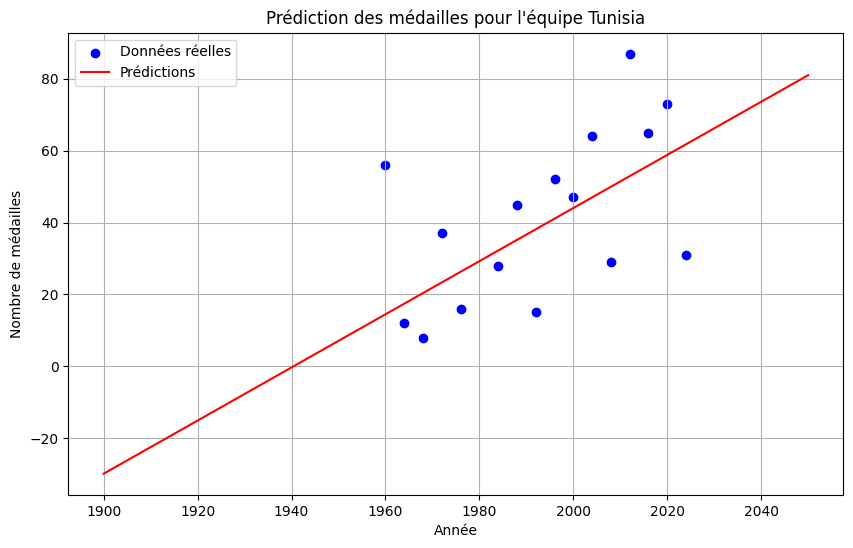

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Vérifier si l'équipe désirée existe dans les données
desired_team = 'Tunisia'
if desired_team in df_aggregated['Team'].unique():
    # Filtrer les données pour l'équipe choisie
    df_country = df_aggregated[df_aggregated['Team'] == desired_team]

    # Définir les variables indépendantes (X) et la variable cible (y)
    X = df_country[['Year']]
    y = df_country['Medals']

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialiser et entraîner le modèle
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Générer les prédictions pour les 5 prochaines années
    future_years = np.array([1900,2050]).reshape(-1, 1)
    predicted_medals = model.predict(future_years)

    # Afficher les résultats
    for year, medals in zip(future_years.flatten(), predicted_medals):
        print(f"Prédiction des médailles pour {year} : {medals:.2f}")

    # Visualisation des prédictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Données réelles')
    plt.plot(future_years, predicted_medals, color='red', label='Prédictions')
    plt.title(f"Prédiction des médailles pour l'équipe {desired_team}")
    plt.xlabel("Année")
    plt.ylabel("Nombre de médailles")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Aucune donnée trouvée pour l'équipe : {desired_team}")
